Exploratory Data analysis and Data visualization: TalkingData Mobile User Demographics

The data is obtained from the ongoing Kaggle Competition:

https://www.kaggle.com/c/talkingdata-mobile-user-demographics/data

Objective:

The overall goal of this ipython notebook serves as a exploratory analysis for the capstone project. Data Exploration has been performed to uncover interesting insights from the data at hand. Extensive Data munging and wrangling has been done to get the data in a format needed for further analysis. Data aggregation, merging different datasets, dealing with the chinese names and missing values have been performed. Feature engineering has been carried out so that new features can be used to built the models. Finally, Data visualizations has been used to tell a story with the data and get a better understanding of the TalkingData users.


In [7]:
import numpy as np

In [8]:
import pandas as pd

In [9]:
import seaborn as sns

In [10]:
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

In [65]:
app_events= pd.read_csv('/Users/Adiii/Documents/Springboard/Capstone Project/app_events.csv')

In [66]:
app_events.head()

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


In [67]:
applabels=pd.read_csv('/Users/Adiii/Documents/Springboard/Capstone Project/app_labels.csv')

In [68]:
gamescat=pd.read_csv('/Users/Adiii/Documents/Springboard/Capstone Project/label_categories.csv')

In [69]:
applabcat=pd.merge(applabels,gamescat,on='label_id',how='left')

In [70]:
applabcat.head()

,app_id,label_id,category
0,7324884708820027918,251,Finance
1,-4494216993218550286,251,Finance
2,6058196446775239644,406,unknown
3,6058196446775239644,407,DS_P2P net loan
4,8694625920731541625,406,unknown


In [78]:
app_events=app_events.astype(int)

In [79]:
app_events.describe()

,event_id,app_id,is_active
count,3.247307e+07,3.247307e+07,3.247307e+07
mean,1.625564e+06,1.182779e+18,3.921094e-01
std,9.384682e+05,5.360173e+18,4.882209e-01
min,2.000000e+00,-9.221157e+18,0.000000e+00
25%,8.134720e+05,-3.474568e+18,0.000000e+00
50%,1.626907e+06,1.387044e+18,0.000000e+00
75%,2.441106e+06,6.043001e+18,1.000000e+00
max,3.252948e+06,9.222488e+18,1.000000e+00


In [73]:
app_events.head()

,event_id,app_id,is_installed,is_active
0,2,5927333115845830913,1,1
1,2,-5720078949152207372,1,0
2,2,-1633887856876571208,1,0
3,2,-653184325010919369,1,1
4,2,8693964245073640147,1,1


In [74]:
#Performing a correlation to see the relationship between different variables
app_events.corr()

,event_id,app_id,is_installed,is_active
event_id,1.000000,0.000068,NaN,0.000733
app_id,0.000068,1.000000,NaN,0.094927
is_installed,NaN,NaN,NaN,NaN
is_active,0.000733,0.094927,NaN,1.000000


In [75]:
del app_events['is_installed']

In [80]:
events= pd.read_csv('/Users/Adiii/Documents/Springboard/Capstone Project/events.csv')

In [81]:
events.head()

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


In [82]:
phone_brand_device= pd.read_csv('/Users/Adiii/Documents/Springboard/Capstone Project/phone_brand_device_model.csv')

In [83]:
phone_brand_device.head()

,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2


In [84]:
# Creating a dictionary to translate chinese brand names to english
english_phone_brands_names = {
    "三星": "samsung",
    "天语": "Ktouch",
    "海信": "hisense",
    "联想": "lenovo",
    "欧比": "obi",
    "爱派尔": "ipair",
    "努比亚": "nubia",
    "优米": "youmi",
    "朵唯": "dowe",
    "黑米": "heymi",
    "锤子": "hammer",
    "酷比魔方": "koobee",
    "美图": "meitu",
    "尼比鲁": "nibilu",
    "一加": "oneplus",
    "优购": "yougo",
    "诺基亚": "nokia",
    "糖葫芦": "candy",
    "中国移动": "ccmc",
    "语信": "yuxin",
    "基伍": "kiwu",
    "青橙": "greeno",
    "华硕": "asus",
    "夏新": "panosonic",
    "维图": "weitu",
    "艾优尼": "aiyouni",
    "摩托罗拉": "moto",
    "乡米": "xiangmi",
    "米奇": "micky",
    "大可乐": "bigcola",
    "沃普丰": "wpf",
    "神舟": "hasse",
    "摩乐": "mole",
    "飞秒": "fs",
    "米歌": "mige",
    "富可视": "fks",
    "德赛": "desci",
    "梦米": "mengmi",
    "乐视": "lshi",
    "小杨树": "smallt",
    "纽曼": "newman",
    "邦华": "banghua",
    "E派": "epai",
    "易派": "epai",
    "普耐尔": "pner",
    "欧新": "ouxin",
    "西米": "ximi",
    "海尔": "haier",
    "波导": "bodao",
    "糯米": "nuomi",
    "唯米": "weimi",
    "酷珀": "kupo",
    "谷歌": "google",
    "昂达": "ada",
    "聆韵": "lingyun",
    "小米": "Xiaomi",
    "华为": "Huawei",
    "魅族": "Meizu",
    "中兴": "ZTE",
    "酷派": "Coolpad",
    "金立": "Gionee",
    "SUGAR": "SUGAR",
    "OPPO": "OPPO",
    "vivo": "vivo",
    "HTC": "HTC",
    "LG": "LG",
    "ZUK": "ZUK",
    "TCL": "TCL",
    "LOGO": "LOGO",
    "SUGAR": "SUGAR",
    "Lovme": "Lovme",
    "PPTV": "PPTV",
    "ZOYE": "ZOYE",
    "MIL": "MIL",
    "索尼" : "Sony",
    "欧博信" : "Opssom",
    "奇酷" : "Qiku",
    "酷比" : "CUBE",
    "康佳" : "Konka",
    "亿通" : "Yitong",
    "金星数码" : "JXD",
    "至尊宝" : "Monkey King",
    "百立丰" : "Hundred Li Feng",
    "贝尔丰" : "Bifer",
    "百加" : "Bacardi",
    "诺亚信" : "Noain",
    "广信" : "Kingsun",
    "世纪天元" : "Ctyon",
    "青葱" : "Cong",
    "果米" : "Taobao",
    "斐讯" : "Phicomm",
    "长虹" : "Changhong",
    "欧奇" : "Oukimobile",
    "先锋" : "XFPLAY",
    "台电" : "Teclast",
    "大Q" : "Daq",
    "蓝魔" : "Ramos",
    "奥克斯" : "AUX"
}

In [85]:
# Mapping chinese brand names to english 
phone_brand_device.phone_brand = phone_brand_device.phone_brand.map(pd.Series(english_phone_brands_names), na_action='ignore')

In [86]:
phone_brand_device.isnull().sum()

device_id         0
phone_brand     113
device_model      0
dtype: int64

In [87]:
train= pd.read_csv('/Users/Adiii/Documents/Springboard/Capstone Project/gender_age_train.csv')

In [88]:
train.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [147]:
merge=pd.merge(events, train, on='device_id',how='left')
merge.head()

,event_id,device_id,timestamp,longitude,latitude,time_hour,week_day,gender,age,group
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24,0,Sunday,M,46.0,M39+
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,0,Sunday,NaN,NaN,NaN
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70,0,Sunday,M,47.0,M39+
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28,0,Sunday,M,30.0,M29-31
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66,0,Sunday,F,28.0,F27-28


In [148]:
merge=pd.merge(merge, phone_brand_device, on='device_id', how='left')
merge.head()

,event_id,device_id,timestamp,longitude,latitude,time_hour,week_day,gender,age,group,phone_brand,device_model
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24,0,Sunday,M,46.0,M39+,Xiaomi,红米note
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,0,Sunday,NaN,NaN,NaN,samsung,Galaxy Grand Prime
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70,0,Sunday,M,47.0,M39+,Meizu,MX4 Pro
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28,0,Sunday,M,30.0,M29-31,vivo,Y27
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66,0,Sunday,F,28.0,F27-28,Coolpad,大神F2


In [89]:
train.gender.value_counts()

M    47904
F    26741
Name: gender, dtype: int64

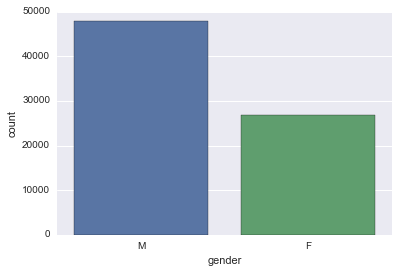

In [90]:
#creating a countplot using seaborn library to count the number of males and females in the training dataset
sns.countplot(x='gender',data=train)

We create a countplot to see the distribution of gender in the training data set. This will give us an initial look into the demographics of the user. There are 74,645 users in the training data set of Talking Data. Among these, 47,904 are males (around 64%) and 26,741 are females (around 36%).

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


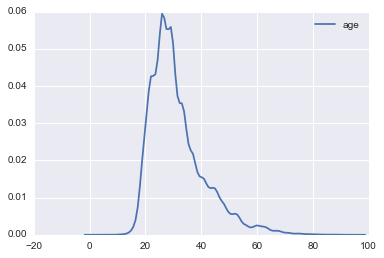

In [91]:
#A kernel density estimation plot to see the distribution of age using seaborn
sns.kdeplot(train.age)

In [92]:
#Descriptive statistics for variable age to check for normal distribution
mean = train['age'].mean()
print('Mean is:', mean)
median = train['age'].median()
print('Median is:', median)
mode = train['age'].mode()
print('Mode is:', mode)
skewness = train['age'].skew()
print('Skewness is:', skewness)
kurtosis = train['age'].kurt()
print('Kurtosis is:', kurtosis)

Mean is: 31.410342286824303
Median is: 29.0
Mode is: 0    26
dtype: int64
Skewness is: 1.3698163418
Kurtosis is: 2.43209308802


//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


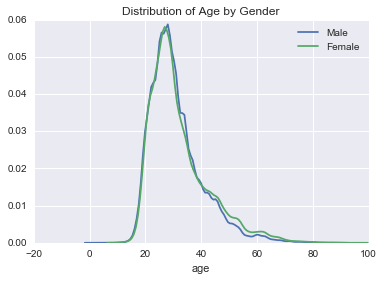

In [93]:
#Creating a distplot using seaborn by filtering males and females in the train dataset
sns.distplot(train[train.gender == 'M'].age, hist=False, label='Male')
sns.distplot(train[train.gender == 'F'].age, hist=False, label='Female')
plt.title('Distribution of Age by Gender')

We create a distplot to see the age distribution of male and female. Since, the mean, median and mode are not equat as well as since the skewness and kurtosis are well over our accepted range of -1 to +1, we can say that the variable age is not normally distributed. Age group of 20 - 40 are the dominate age as we see a high peak for that age category. This means most of (maximum) talkingdata's users fall in this age category. We also see that, females at old age are more active (use more mobile devices) than males at the same age.

In [94]:
# The median age in the training data set is 29
np.round(train.age.median())

29.0

In [95]:
# The mean age in the training data set is 31
np.round(train.age.mean())

31.0

In [96]:
# The mean age in the training data set for males is 31
np.round(train[train.gender == 'M'].age.mean())

31.0

In [97]:
# The mean age in the training data set for females is 32
np.round(train[train.gender == 'F'].age.mean())

32.0

In [98]:
train.group.value_counts()

M23-26    9605
M32-38    9476
M39+      8581
M22-      7488
M29-31    7309
F33-42    5561
M27-28    5445
F23-      5050
F29-32    4628
F43+      4194
F24-26    4190
F27-28    3118
Name: group, dtype: int64

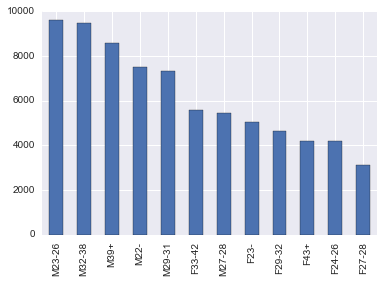

In [99]:
#Plotting a bar graph to display the count of various age groups
train.group.value_counts().sort_values(ascending=False).plot('bar')

The above plot tells us that most of the talking data users are Males in th age group 23-26. The next age group is Males 32-38 with the difference between the two groups not significant. This is in concurrence to our kdeplot where we found that maximum talkingdata users were between 20-40. Females in the age group 27-28 are the least users of talkingdata according to the plot we have. 

In [100]:
events['timestamp']=pd.to_datetime(events['timestamp'])
events['time_hour'] = events['timestamp'].apply(lambda x: x.hour)

In [101]:
#event frequency by hour
events['time_hour'].value_counts()

10    183839
21    181175
20    178179
22    168246
11    167025
19    166160
9     166061
12    162745
8     157896
18    156209
13    155337
17    153516
14    151379
16    150732
15    149912
7     146667
23    136339
0     120512
6     116370
1      72671
5      66411
2      53764
3      47048
4      44757
Name: time_hour, dtype: int64

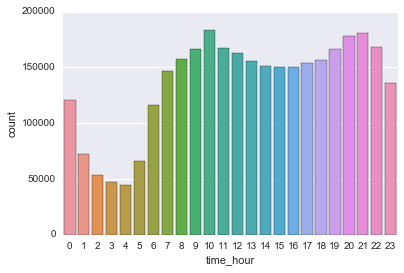

In [102]:
ax = sns.countplot(x="time_hour", data=events)

We create a new feature, hour from the timestamp variable in the initial dataset. After plotting a count plot for this new feature, we notice that hours 10 and 21 have the maximum number of events recorded in the talking data dataset. Hours 10 and 21 correspond to 10:00 AM and 9:00 PM. Such a visualisation makes sense as users are more likely to be active at 10:00 AM when they travel for work or start their day. Also, 9:00 PM represents a time after dinner and users are more likely to use their mobile and browse apps as they unwind and relax just before sleep.

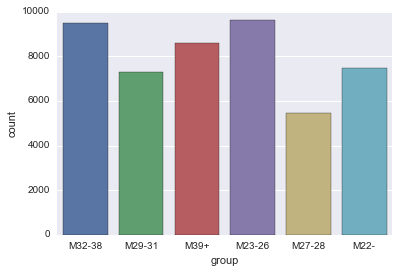

In [103]:
#Countplot for different age groups of males
ax= sns.countplot(x='group', data=train[train.gender=='M'])

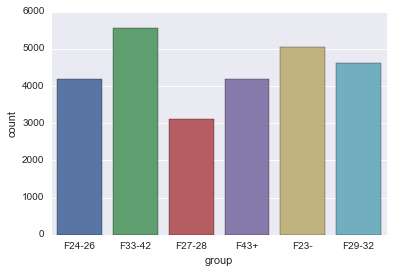

In [104]:
#Countplot for different age groups of females
ax= sns.countplot(x='group', data=train[train.gender=='F'])

In [105]:
import calendar

In [106]:
events['week_day'] = events.timestamp.apply(lambda x: calendar.day_name[x.weekday()])

In [107]:
events.week_day.value_counts()

Tuesday      483293
Thursday     478999
Wednesday    473487
Friday       471730
Monday       451546
Saturday     449304
Sunday       444591
Name: week_day, dtype: int64

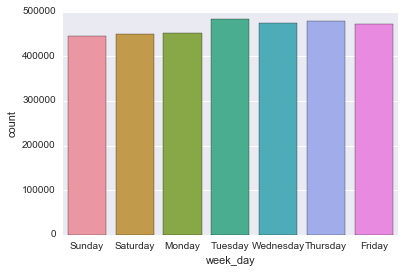

In [108]:
ax=sns.countplot(x='week_day',data=events)

After creating a countplot for all the events occured in the TalkingData SDK, we observe that maximum events are recorded on a tuesday followed by a thursday. This is an interesting insight as you would assume maximum events to be occuring on weekends. This is further surprising as we see that the weekends (Saturday and Sunday) have the least number of events.

In [109]:
#Filtering out the users who are active
active_events=app_events[app_events.is_active==1]

In [110]:
#Merging it with apps
active_apps = active_events.merge(events, how='inner', on='event_id')

In [111]:
active_apps.head()

,event_id,app_id,is_active,device_id,timestamp,longitude,latitude,time_hour,week_day
0,2,5927333115845830913,1,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,0,Sunday
1,2,-653184325010919369,1,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,0,Sunday
2,2,8693964245073640147,1,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,0,Sunday
3,2,4775896950989639373,1,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,0,Sunday
4,2,7167114343576723123,1,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,0,Sunday


In [133]:
#Performing a merge operation to get the categories of the apps for the various devices
devices_cat=pd.merge(active_apps,applabcat,on='app_id',how='inner')

In [134]:
devices_cat.shape

(71376435, 11)

In [135]:
devices_cat.head()

,event_id,app_id,is_active,device_id,timestamp,longitude,latitude,time_hour,week_day,label_id,category
0,2,5927333115845830913,1,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,0,Sunday,549,Property Industry 1.0
1,2,5927333115845830913,1,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,0,Sunday,710,Relatives 1
2,2,5927333115845830913,1,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,0,Sunday,704,Property Industry 2.0
3,2,5927333115845830913,1,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,0,Sunday,548,Industry tag
4,2,5927333115845830913,1,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,0,Sunday,172,IM


In [136]:
#Since the merge operation and the given data files are very large, we consider 100000 entries to do on our analysis on a small chunk of data
devices_cat[71276435:].to_csv('dc.csv')

In [137]:
dc= pd.read_csv('/Users/Adiii/Documents/Springboard/Capstone Project/dc.csv')

In [138]:
dc.head()

,Unnamed: 0,event_id,app_id,is_active,device_id,timestamp,longitude,latitude,label_id,category
0,71276435,558879,1128742343711836645,1,7213528685545856354,2016-05-03 19:39:48,123.78,41.86,306,unknown
1,71276436,558879,1128742343711836645,1,7213528685545856354,2016-05-03 19:39:48,123.78,41.86,302,unknown
2,71276437,558879,1128742343711836645,1,7213528685545856354,2016-05-03 19:39:48,123.78,41.86,857,free
3,71276438,558879,1128742343711836645,1,7213528685545856354,2016-05-03 19:39:48,123.78,41.86,854,Property Industry new
4,71276439,558879,1128742343711836645,1,7213528685545856354,2016-05-03 19:39:48,123.78,41.86,209,pictures photography


In [139]:
s=pd.to_datetime(dc.timestamp)

In [140]:
#Feature Engineering (Extracting important features from timestamp)
dc['day']=s.dt.day

In [141]:
dc['month']=s.dt.month

In [142]:
dc['year']=s.dt.year

In [143]:
dc['hour']=s.dt.hour

In [144]:
dc['minute']=s.dt.minute

In [145]:
dc.head()

,Unnamed: 0,event_id,app_id,is_active,device_id,timestamp,longitude,latitude,label_id,category,day,month,year,hour,minute
0,71276435,558879,1128742343711836645,1,7213528685545856354,2016-05-03 19:39:48,123.78,41.86,306,unknown,3,5,2016,19,39
1,71276436,558879,1128742343711836645,1,7213528685545856354,2016-05-03 19:39:48,123.78,41.86,302,unknown,3,5,2016,19,39
2,71276437,558879,1128742343711836645,1,7213528685545856354,2016-05-03 19:39:48,123.78,41.86,857,free,3,5,2016,19,39
3,71276438,558879,1128742343711836645,1,7213528685545856354,2016-05-03 19:39:48,123.78,41.86,854,Property Industry new,3,5,2016,19,39
4,71276439,558879,1128742343711836645,1,7213528685545856354,2016-05-03 19:39:48,123.78,41.86,209,pictures photography,3,5,2016,19,39


In [149]:
merge[:100000].to_csv('merge.csv')

In [150]:
merge_trunc=pd.read_csv('/Users/Adiii/Documents/Springboard/Capstone Project/merge.csv')

In [151]:
merge_trunc.head()

,Unnamed: 0,event_id,device_id,timestamp,longitude,latitude,gender,age,group,phone_brand,device_model
0,0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24,M,46.0,M39+,Xiaomi,红米note
1,1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97,NaN,NaN,NaN,samsung,Galaxy Grand Prime
2,2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70,M,47.0,M39+,Meizu,MX4 Pro
3,3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28,M,30.0,M29-31,vivo,Y27
4,4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66,F,28.0,F27-28,Coolpad,大神F2


In [153]:
#Merge operation on the two truncated files
dev_cat_merge=pd.merge(dc, merge_trunc, on='device_id', how='left')

In [154]:
dev_cat_merge.head()

,Unnamed: 0_x,event_id_x,app_id,is_active,device_id,timestamp_x,longitude_x,latitude_x,label_id,category,...,Unnamed: 0_y,event_id_y,timestamp_y,longitude_y,latitude_y,gender,age,group,phone_brand,device_model
0,71276435,558879,1128742343711836645,1,7213528685545856354,2016-05-03 19:39:48,123.78,41.86,306,unknown,...,15490.0,15399.0,2016-05-06 14:40:09,123.78,41.86,NaN,NaN,NaN,Meizu,魅蓝NOTE
1,71276435,558879,1128742343711836645,1,7213528685545856354,2016-05-03 19:39:48,123.78,41.86,306,unknown,...,83836.0,83364.0,2016-05-03 07:46:32,123.78,41.86,NaN,NaN,NaN,Meizu,魅蓝NOTE
2,71276436,558879,1128742343711836645,1,7213528685545856354,2016-05-03 19:39:48,123.78,41.86,302,unknown,...,15490.0,15399.0,2016-05-06 14:40:09,123.78,41.86,NaN,NaN,NaN,Meizu,魅蓝NOTE
3,71276436,558879,1128742343711836645,1,7213528685545856354,2016-05-03 19:39:48,123.78,41.86,302,unknown,...,83836.0,83364.0,2016-05-03 07:46:32,123.78,41.86,NaN,NaN,NaN,Meizu,魅蓝NOTE
4,71276437,558879,1128742343711836645,1,7213528685545856354,2016-05-03 19:39:48,123.78,41.86,857,free,...,15490.0,15399.0,2016-05-06 14:40:09,123.78,41.86,NaN,NaN,NaN,Meizu,魅蓝NOTE


In [155]:
#We perfrom a groupby to get a new feature, 'count' of various apps a particular device uses
g=dev_cat_merge.groupby(['device_id','category','label_id','app_id'])['app_id'].agg(['size'])

In [156]:
g.head(10)

size
device_id            category                      label_id app_id                    
-9221767098072603291 Health Management             207      -3753877773376207044     6
-9221079146476055829 Industry tag                  548      -8775272028048552284     2
                                                            -4576330983666691135     1
                     Maternal and child population 840      -4576330983666691135     1
                     Personal Effectiveness        870      -8775272028048552284     2
                     Pregnant baby                 843      -4576330983666691135     1
                     Property Industry new         854      -8775272028048552284     2
                     unknown                       302      -4576330983666691135     1
                                                   318      -4576330983666691135     1
-9220830859283101130 Cute style comic              100       4551351600893140022     1

In [112]:
gd = active_apps.groupby(['device_id'])

In [113]:
apps_per_device = gd.app_id.nunique()

In [114]:
apps_per_device.describe()

count    60669.000000
mean        15.006972
std         15.086517
min          1.000000
25%          5.000000
50%         12.000000
75%         21.000000
max       1342.000000
Name: app_id, dtype: float64

Filtering out the devices that are active, we find that there are 60669 active apps on devices.
The maximum number of app on a single device is 1342. Finally, we observe that 75% of devices contain at most 21 apps.

In [115]:
cat_devices = active_apps.groupby(['device_id', 'app_id']).first().reset_index()

In [116]:
cat_devices.head()

,device_id,app_id,event_id,is_active,timestamp,longitude,latitude,time_hour,week_day
0,-9222956879900151005,-8670045756254444686,662820,1,2016-05-07 12:04:46,113.24,23.19,12,Saturday
1,-9222956879900151005,-7937802522076404023,205471,1,2016-05-06 15:36:46,113.24,23.19,15,Friday
2,-9222956879900151005,-7633370358426043343,211711,1,2016-05-06 21:26:14,113.24,23.19,21,Friday
3,-9222956879900151005,-7339430059748502738,11281,1,2016-05-07 11:36:04,0.00,0.00,11,Saturday
4,-9222956879900151005,-6922429635537039162,205471,1,2016-05-06 15:36:46,113.24,23.19,15,Friday


In [117]:
labels=pd.read_csv('/Users/Adiii/Documents/Springboard/Capstone Project/app_labels.csv')

In [118]:
label_cat=pd.read_csv('/Users/Adiii/Documents/Springboard/Capstone Project/label_categories.csv')

In [119]:
cat_devices = cat_devices.merge(labels, how='left', on='app_id').merge(label_cat, how='left', on='label_id')

In [120]:
cat_devices.head()

,device_id,app_id,event_id,is_active,timestamp,longitude,latitude,time_hour,week_day,label_id,category
0,-9222956879900151005,-8670045756254444686,662820,1,2016-05-07 12:04:46,113.24,23.19,12,Saturday,959,financial
1,-9222956879900151005,-8670045756254444686,662820,1,2016-05-07 12:04:46,113.24,23.19,12,Saturday,960,P2P
2,-9222956879900151005,-8670045756254444686,662820,1,2016-05-07 12:04:46,113.24,23.19,12,Saturday,548,Industry tag
3,-9222956879900151005,-8670045756254444686,662820,1,2016-05-07 12:04:46,113.24,23.19,12,Saturday,1007,P2P net loan
4,-9222956879900151005,-7937802522076404023,205471,1,2016-05-06 15:36:46,113.24,23.19,15,Friday,959,financial


In [121]:
cat_devices[['device_id', 'app_id', 'category']].head()

,device_id,app_id,category
0,-9222956879900151005,-8670045756254444686,financial
1,-9222956879900151005,-8670045756254444686,P2P
2,-9222956879900151005,-8670045756254444686,Industry tag
3,-9222956879900151005,-8670045756254444686,P2P net loan
4,-9222956879900151005,-7937802522076404023,financial


In [122]:
g=cat_devices.groupby(['device_id'])

In [123]:
g.head()

,device_id,app_id,event_id,is_active,timestamp,longitude,latitude,time_hour,week_day,label_id,category
0,-9222956879900151005,-8670045756254444686,662820,1,2016-05-07 12:04:46,113.24,23.19,12,Saturday,959,financial
1,-9222956879900151005,-8670045756254444686,662820,1,2016-05-07 12:04:46,113.24,23.19,12,Saturday,960,P2P
2,-9222956879900151005,-8670045756254444686,662820,1,2016-05-07 12:04:46,113.24,23.19,12,Saturday,548,Industry tag
3,-9222956879900151005,-8670045756254444686,662820,1,2016-05-07 12:04:46,113.24,23.19,12,Saturday,1007,P2P net loan
4,-9222956879900151005,-7937802522076404023,205471,1,2016-05-06 15:36:46,113.24,23.19,15,Friday,959,financial
441,-9222661944218806987,-7326028556762203740,118332,1,2016-05-04 21:58:07,0.00,0.00,21,Wednesday,721,Personal Effectiveness 1
442,-9222661944218806987,-7326028556762203740,118332,1,2016-05-04 21:58:07,0.00,0.00,21,Wednesday,704,Property Industry 2.0
443,-9222661944218806987,-7326028556762203740,118332,1,2016-05-04 21:58:07,0.00,0.00,21,Wednesday,548,Industry tag
444,-9222661944218806987,-7326028556762203740,118332,1,2016-05-04 21:58:07,0.00,0.00,21,Wednesday,232,notes
445,-9222661944218806987,-1633938282180439957,118332,1,2016-05-04 21:58:07,0.00,0.00,21,Wednesday,549,Property Industry 1.0


In [124]:
device_categories = g.category.nunique().to_frame().reset_index()

In [125]:
device_categories.head()

,device_id,category
0,-9222956879900151005,52
1,-9222661944218806987,31
2,-9222399302879214035,25
3,-9221825537663503111,46
4,-9221767098072603291,42


In [126]:
device_categories.describe()

,device_id,category
count,6.066900e+04,60669.000000
mean,-1.655896e+16,31.354794
std,5.333714e+18,20.745542
min,-9.222957e+18,1.000000
25%,-4.668856e+18,15.000000
50%,-1.471330e+16,27.000000
75%,4.609620e+18,45.000000
max,9.222540e+18,332.000000


We perform some data manipulation to get the number of categories for each device. After succesffuly performing some data wrangling, we can see that 75% of devices have at most 45 categories. Maximum categories per device which are basically the outliers has 332 categories. Each user has an average of 31 categories on their device. 

In [127]:
brand_count=phone_brand_device.phone_brand.value_counts().head()

In [128]:
phone_brand_merge=train.merge(phone_brand_device)

In [129]:
phone_brand_merge.head()

,device_id,gender,age,group,phone_brand,device_model
0,-8076087639492063270,M,35,M32-38,Xiaomi,MI 2
1,-2897161552818060146,M,35,M32-38,Xiaomi,MI 2
2,-8260683887967679142,M,35,M32-38,Xiaomi,MI 2
3,-4938849341048082022,M,30,M29-31,Xiaomi,红米note
4,245133531816851882,M,30,M29-31,Xiaomi,MI 3


In [130]:
top5_brands = np.array(brand_count.index)

In [131]:
top5_brands_df=phone_brand_merge[phone_brand_merge.phone_brand.isin(top5_brands)]

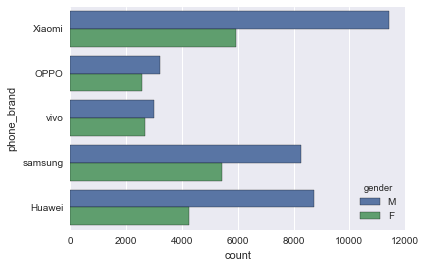

In [132]:
sns.countplot(y="phone_brand", hue="gender", data=top5_brands_df)

We perform a merge operation to see the popular phone brands of all the users. The top 5 brands of the Talkingdata users are Xiaomi, OPPO, Vivo, Samsung and Huawei. We can further see that the number of males in the top three phone brands i.e. Xiomi, Samsung and Huawei are twice as much as the number of females for these brands.